In [40]:
from scipy.stats import f as f_test
from scipy.stats import ncf
from scipy.stats import t as t_test
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### ANOVA

* Assumptions

1. Independence of the observations 

2. No significant outliers

3. Normality

4. Homogeneity of variances : The variance among the group should be approximately equal

It is important to note that ANOVA is not robust to violations to the assumption of independence. This is to say, that even if you violate the assumptions of homogeneity or normality, you can conduct the test and basically trust the findings. However, the results of the ANOVA are invalid if the independence assumption is violated. In general, with violations of homogeneity the analysis is considered robust if you have equal sized groups. With violations of normality, continuing with the ANOVA is generally ok if you have a large sample size.

* When to use ANOVA

1. No matter what distribution the population is, if the sample size is over 30, the sameple means approach normal distribution. If we want to compare multiple sample means, we use ANOVA.

2. Given the population is normal distribution, the sample means is thus normal distribution. If we want to compare multiple sample means, we use ANOVA.

##### Effect Size

The effect size tells us how much do the data differ from the hypothosis.

![](effect_size.png)

| d | Effect Size |
| --- | --- |
| 0.14 | large |
| 0.06 | medium |
| 0.01 | small |

##### Power Analysis

Power analysis answers questions like "how much statistical power does my study have?" and "how big a sample size do I need?".

![](power_analysis.PNG)

If H0 is not rejected, F score is in f-distribution.

If H0 is rejected, F score is in non-central f-distribution

![](f_distribution.PNG)

![](non_central_parameter.PNG) 
![](parameter.PNG)

### Post Hoc Test

ANOVA can only know whether the mean of three or more groups are the same. However, it can not tell us how one group differs from a certain group. We can not use t-test in this situation because the type I error will increase if we use t-test on the same group multiple times. Instead, we use post hoc test which is a more rigorous test than t-test.

![](FWER.PNG)

1. Tukey HSD: Used to determine whether there is a difference between the mean of all possible pairs using a studentized range distribution.

2. Dunnet method: Used to determine whether there is a difference from the control group using modified t-test statistics (Dunnett's t-distribution)

![](choose_post_hoc.jpg)

![see more](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6193594/)

### Question 1

---

From our survey we can calculate Caffeiene consumption as a function of how much you
said you liked math. Here is a table of statistics based on our survey:

|| Not at all | Just a little | A fair amount | Very much |
|---|---|---|---|---|
| n | 14 | 56 | 75 | 6 |
|mean | 1.21 | 1.01 | 1.41 | 3 |
|SS | 7.8574 | 41.7456 | 354.1363 | 108 |
| ntotal | 151 |
|grand mean | 1.3065 |
|SStotal | 534.834 |

Calculate the standard errors of the mean for each of the 4 groups.

Make a bar graph of the means for each of the 4 groups with error bars as the standard
error of the means.

Using an alpha value of α = 0.05, is there difference in Caffeine consumption across the 4 groups of students who vary their preference for math?

* from one_factor_ANOVA_tutorial.pdf

In [41]:
n = np.array([14, 56, 75, 6])
n_total = np.sum(n)
mean = np.array([1.21, 1.01, 1.41, 3])
SSW_g = np.array([7.8574, 41.7456, 354.1363, 108])
mu = np.average(mean, weights=n)
SST = 534.834
alpha = 0.05

SSW = np.sum(SSW_g)
SSB = np.sum( np.square(mean - mu) * n )

k = 4
df_SSW = n_total - k
df_SSB = k - 1

H<sub>0 : There is no difference among group means

H<sub>1 : At lease one group differs significantly from the overrall mean of the dependent variable. 

In [48]:
MSW = SSW / df_SSW
MSB = SSB / df_SSB
f = MSB / MSW
print("F: ", f)

f_crit = f_test.ppf(1 - alpha, dfn=df_SSB, dfd=df_SSW)
print("F_crit: ", f_crit)

p_value = 1 - f_test.cdf(f, dfn=df_SSB, dfd=df_SSW)
print("p_value: ", p_value)

eta_square = SSB / SST 
print("eta_square: ", eta_square)

F:  2.208471453651477
F_crit:  2.6661487758521765
p_value:  0.08956999737639892
eta_square:  0.04312463900725823


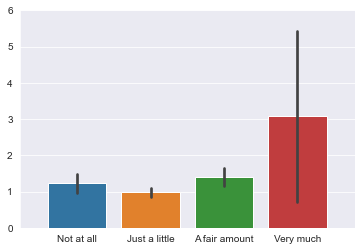

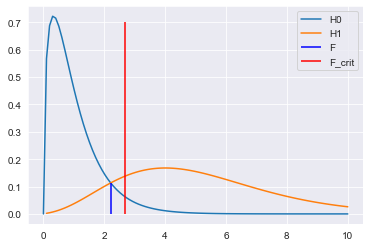

In [49]:
### standard deviation of the sample mean of each group
SW_g = np.sqrt(SSW_g / (n - 1)) / np.sqrt(n)
data = [0 for i in range(k)]
for i in range(k):
    data[i] = t_test.rvs(df=n[i]-1, loc=mean[i], scale=SW_g[i], size=100)

plt.figure(1)
plot = sns.barplot(data=data, ci='sd')
plot.set_xticklabels(["Not at all",  "Just a little", "A fair amount",  "Very much"])
plot.margins(0.1)
plot.set_ylim(0, 6)

### non-central parameter
sample_std = np.sqrt(SST / (n_total - 1))
nc = SSB / sample_std

x = np.linspace(0, 10, num=100)
y0 = f_test.pdf(x, dfn=df_SSB, dfd=df_SSW)
y1 = ncf.pdf(x, dfn=df_SSB, dfd=df_SSW, nc=nc)
plt.figure(2)
plot = sns.lineplot(x=x, y=y0, label="H0")
plot = sns.lineplot(x=x, y=y1, label="H1")
plt.vlines(f, 0, f_test.pdf(f, dfn=df_SSB, dfd=df_SSW), 'b', label='F')
plt.vlines(f_crit, 0, 0.7, 'r', label='F_crit')
plt.legend()

#### Ans:

Since p_value > α, we failed to reject H<sub>0. 

There is not a significant difference in mean Caffeine consumption across the 4 groups of students who vary their preference.

The effect size calculated by eta-squared is 0.04 which is medium.

β (Type II Error) = 0.234 which means if we rejected H1, the sample mean is 23.4% to be H1.